In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_FILE = 'sample_image.jpg' 

1. Image Shape: (316, 512, 3)
R: 0 255
G: 0 255
B: 0 255
Image scaled to 0.0-1.0 for consistency.


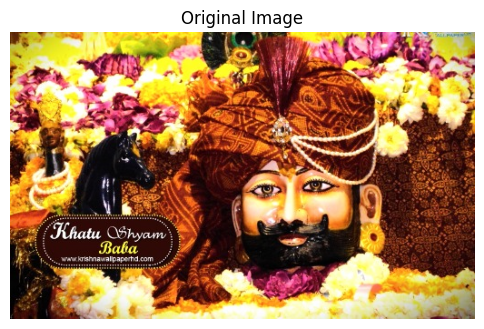

In [ ]:
img = mpimg.imread(IMAGE_FILE)

print(f"1. Image Shape: {img.shape}")
print("R:", img[:,:,0].min(), img[:,:,0].max())
print("G:", img[:,:,1].min(), img[:,:,1].max())
print("B:", img[:,:,2].min(), img[:,:,2].max())

if np.max(img) > 1.0:
    img = img / 255.0
    print("Image scaled to 0.0-1.0 for consistency.")

plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.axis('off')
plt.imshow(img)
plt.show()

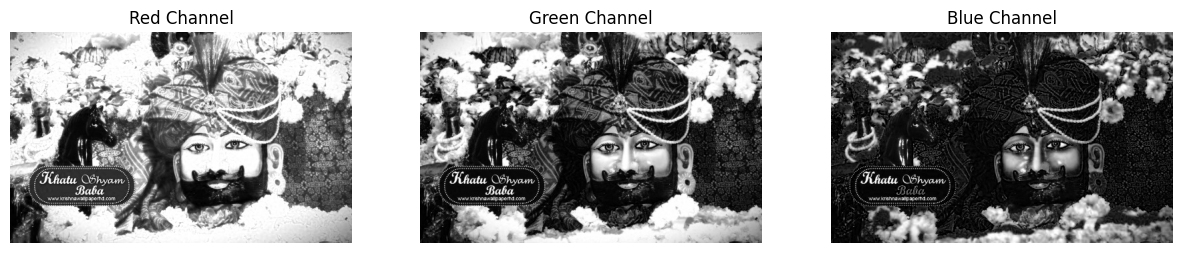

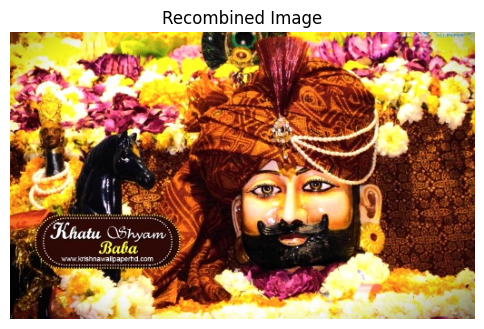

In [ ]:
# 1. Extract R, G, B 
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(R, cmap='gray'); axes[0].set_title("Red Channel"); axes[0].axis('off')
# cma='grey' implies that the images after seapartion of each channel will also be of graysc 
axes[1].imshow(G, cmap='gray'); axes[1].set_title("Green Channel"); axes[1].axis('off')
axes[2].imshow(B, cmap='gray'); axes[2].set_title("Blue Channel"); axes[2].axis('off')

plt.show()

recombined_img = np.stack([R, G, B], axis=-1)

plt.figure(figsize=(6, 6))
plt.imshow(recombined_img)
plt.title("Recombined Image")
plt.axis('off')
plt.show()

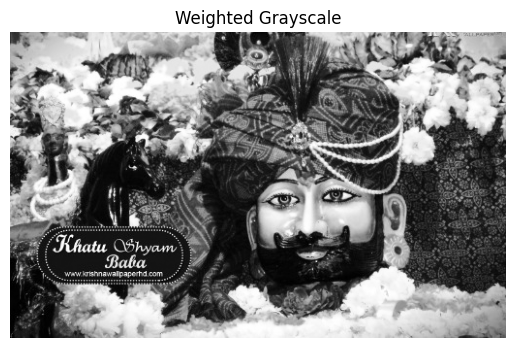

In [4]:
gray_weighted = (0.299 * R +0.587 * G +0.114 * B)

plt.imshow(gray_weighted, cmap='gray')
plt.axis("off")
plt.title("Weighted Grayscale")
plt.show()

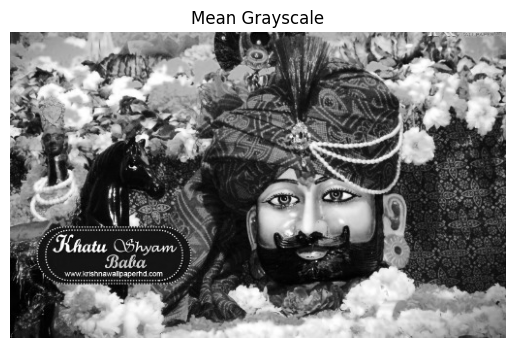

In [5]:
gray_mean = np.mean(img[:, :, :3], axis=2)
plt.imshow(gray_mean, cmap='gray')
plt.axis("off")
plt.title("Mean Grayscale")
plt.show()

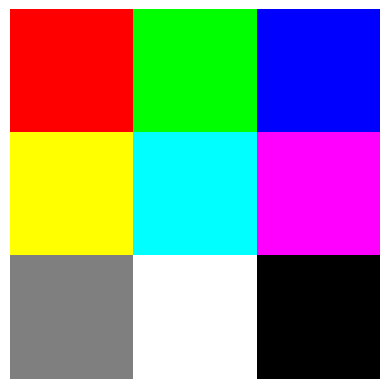

Pixel (0,0) RGB = [1. 0. 0.]
Pixel (0,1) RGB = [0. 1. 0.]
Pixel (0,2) RGB = [0. 0. 1.]
Pixel (1,0) RGB = [1. 1. 0.]
Pixel (1,1) RGB = [0. 1. 1.]
Pixel (1,2) RGB = [1. 0. 1.]
Pixel (2,0) RGB = [0.5 0.5 0.5]
Pixel (2,1) RGB = [1. 1. 1.]
Pixel (2,2) RGB = [0. 0. 0.]


In [6]:
img_small = np.array([
    [[1, 0, 0],   [0, 1, 0],   [0, 0, 1]],
    [[1, 1, 0],   [0, 1, 1],   [1, 0, 1]],
    [[0.5, 0.5, 0.5], [1, 1, 1], [0, 0, 0]]
])
plt.imshow(img_small)
plt.axis("off")
plt.show()
for i in range(3):
    for j in range(3):
        print(f"Pixel ({i},{j}) RGB =", img_small[i, j])
#Each cell's value mathes the expected results.

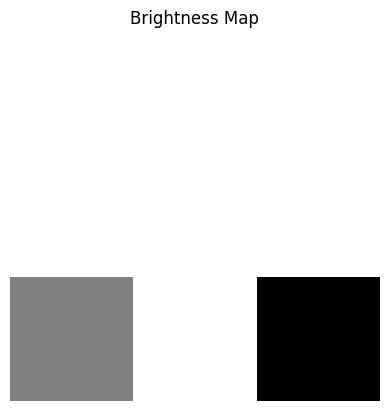

In [7]:
def brightness(img):
    return np.max(img, axis=2)  
bright_map = brightness(img_small)

plt.imshow(bright_map, cmap='gray')
plt.axis("off")
plt.title("Brightness Map")
plt.show()
#Brightness is calculated by taking the maximum intensity among the RGB channels at each pixel.

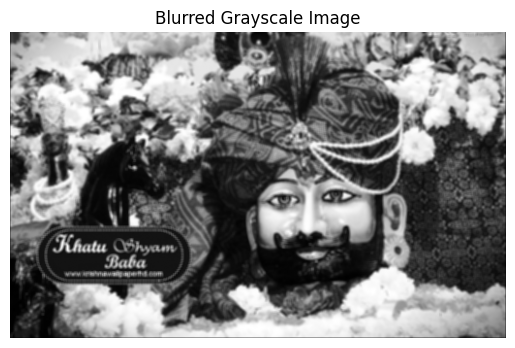

In [8]:
def blur_gray(img):
    kernel = np.ones((3, 3)) / 9
    h, w = img.shape

    padded = np.pad(img, 1, mode='constant')
    output = np.zeros_like(img)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            output[i, j] = np.sum(region * kernel)
    return output
blurred = blur_gray(gray_weighted)
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.title("Blurred Grayscale Image")
plt.show()

In [9]:
#Part D — Reflection
# What does a convolution kernel do?
# A convolution kernel slides each pixel(except padding portion) and combines the values of neighboring pixels to produce effects such as blurring, sharpening, or edge detection.

# How does changing the kernel affect the output?
# Changing the kernel changes the logic how neighbouring pixels are combined, which changes the output.Eg: averaging kernels blur the image, while edge kernels highlight boundaries.

# 3. Why does grayscale use weighted averages instead of a simple mean?
# Human vision is more sensitive to green and less to blue, so weighted averages produce a grayscale image that appears more natural than a simple mean.